# Proyecto Encuesta de Emprendimientos

## Etapas del análisis
1. **Comprensión y preparación de los datos**: tipos de variables, nulos, codificación, normalización/estandarización.
2. **Análisis descriptivo**: distribución, tablas de frecuencia, medidas de tendencia central y dispersión.
3. **Correlaciones y asociaciones**: Pearson/Spearman, Chi-cuadrado, (ACM para categóricas).
4. **Reducción de dimensionalidad**: PCA (numéricas) y/o ACM (categóricas).
5. **Segmentación (clustering)**: K-Means/K-Medoids/Jerárquico; selección de *k* (Elbow/Silhouette).
6. **Perfilamiento**: caracterización de clústeres por variables clave.
7. **Conclusiones y recomendaciones**: hallazgos, implicaciones y líneas de acción.

# Proyecto

## Librerias

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
from scipy.stats import entropy
from itertools import combinations
from scipy.stats import chi2_contingency
from IPython.display import display
import prince

## Datos

### Carga de datos
Este bloque **carga** el conjunto de datos desde la fuente indicada y realiza ajustes iniciales (ruta, hoja, separador, tipos).

In [2]:
preprocessd = pd.read_csv(r"Copia de DATA EMPRENDIMIENTOS.xlsx - Respuestas de formulario 1 (1).csv")
preprocessd

,1. Edad,\n2. ¿Con que género se identifica?,\n3. Estado civil,4. Lugar de residencia,5. ¿En qué tipo de vivienda reside actualmente?,6. Ingresos mensuales aproximados\n,7. ¿En qué área obtuviste el título universitario?,8. ¿Cuál es el nombre de su emprendimiento?,9. ¿A qué sector pertenece el emprendimiento?,10. ¿Posee conocimiento sobre la elaboración de un estado de resultados para su emprendimiento?,...,"52. ¿De acuerdo a su experiencia, qué factor considera más importante para un emprendimiento?",53. ¿Considera que las practicas de contabilidad ambiental pueden proporcionar una ventaja competitiva para los emprendimientos rurales?,54. ¿Considera que los emprendimientos rurales tienen un impacto positivo en el desarrollo económico de las zonas rurales?,55. ¿Considera qué el emprendimiento rural ayuda a reducir la pobreza en las zonas rurales?,56. ¿Considera qué es importante proporcionar acceso a la educación y la formación para los emprendedores rurales?,57. ¿Considera qué es importante proporcionar acceso a la financiación para los emprendedores rurales?,58. ¿Señale que problema puede causar el emprendimiento en el medio ambiente?,\n59. ¿Qué beneficios ve en los emprendimientos rurales?\n,60. ¿Cuál considera como principal desafío que enfrenta el área rural?,61. De acuerdo a la pregunta anterior indicar por qué
0,3,1,1,1,3,1,2,Joyería bella Donna,1,4,...,5,4,4,4,4,4,2,3,3,No se
1,3,1,1,1,1,3,1,Sol y Mar ropa femenina,3,5,...,4,5,5,5,5,5,5,4,6,Es importante capacitar a las personas sobre e...
2,4,1,1,1,2,2,1,JAPELIVOTEC R&R SAS,3,4,...,4,5,5,5,5,5,6,4,1,SI ES COMPLICADO QUE LE DEN CREDITO A UN EMPRE...
3,2,1,1,2,2,2,1,Arepas Jerusalén,1,5,...,4,5,5,5,5,5,6,3,1,.
4,2,1,1,1,3,2,3,Unidad Dog Family,3,4,...,3,4,5,5,5,5,1,2,1,Cómo no tienen recurso no pueden acceder a fin...
5,2,1,3,2,3,3,1,Arepas de maiz Jerusalen,3,3,...,4,4,4,5,5,5,6,2,6,es complicado para el sector rural tener una b...
6,2,1,1,2,3,3,1,"Creación de granja porcícola ""La Macoya"" en el...",1,5,...,4,5,5,4,5,5,6,2,6,"Porque generalmente en el sector rural, los ha..."
7,3,1,1,1,1,2,1,Productos cárnicos mundo mujer,1,4,...,3,4,3,4,4,4,6,1,6,.
8,5,2,1,1,1,3,1,Kanalu Jeans,2,5,...,1,5,5,5,5,5,6,1,3,El area rural tiene los ingresos y el mercado ...
9,4,1,1,1,2,2,1,INCOL INGENIERIA DE INSPECCION COLOMBIANA SAS,3,5,...,4,4,4,4,4,4,6,3,1,SI


### Diccionario para cambio de nombre y categorización

In [3]:
column_rename_dict = {
    "1. Edad": "Edad",
    "\n2. ¿Con que género se identifica?": "Género",
    "\n3. Estado civil": "Estado_Civil",
    "4. Lugar de residencia": "Residencia",
    "5. ¿En qué tipo de vivienda reside actualmente?": "Tipo_Vivienda",
    "6. Ingresos mensuales aproximados\n": "Ingresos_Mensuales",
    "7. ¿En qué área obtuviste el título universitario?": "Área_Título_Universitario",
    "8. ¿Cuál es el nombre de su emprendimiento?": "Nombre_Emprendimiento",
    "9. ¿A qué sector pertenece el emprendimiento?": "Sector_Emprendimiento",
    "10. ¿Posee conocimiento sobre la elaboración de un estado de resultados para su emprendimiento?": "Conocimiento_Estado_Resultados",
    "\n11. ¿Posee los conocimientos necesarios para la elaboración de un balance general?": "Conocimiento_Balance_General",
    "12. ¿Posee usted conocimiento sobre el cálculo del flujo de efectivo?": "Conocimiento_Flujo_Efectivo",
    "13. ¿Posee conocimientos sobre análisis de estados financieros?": "Conocimiento_Analisis_Financiero",
    "14.  ¿En qué medida realiza análisis de costos en su emprendimiento?": "Analisis_Costos",
    "15. ¿En qué medida utiliza un sistema de contabilidad para rastrear sus ingresos?  ": "Uso_Contabilidad_Ingresos",
    "16. ¿En qué medida utiliza un sistema de contabilidad para rastrear sus gastos?  ": "Uso_Contabilidad_Gastos",
    "17. ¿Piensa que evalúa sus costos para identificar oportunidades de reducción?": "Evaluacion_Costos_Reduccion",
    "18. ¿Considera que maneja un presupuesto para su emprendimiento?": "Manejo_Presupuesto",
    "19. ¿Considera que el control interno puede ayudar a mejorar la eficiencia del emprendimiento? ": "Control_Interno_Mejora_Eficiencia",
    "20. ¿Utiliza su presupuesto para tomar decisiones financieras?": "Uso_Presupuesto_Decisiones_Financieras",
    "21. ¿Evalúa su presupuesto para identificar oportunidades de mejora?": "Evaluacion_Presupuesto_Mejoras",
    "22. ¿Cómo calificaría los procesos de solicitud  de prestamos bancarios?": "Calificacion_Procesos_Solicitud_Prestamos",
    "23. Deacuerdo a la pregunta anterior indicar ¿por qué?": "Razon_Procesos_Solicitud_Prestamos",
    "24. ¿Cómo calificaría los términos de los prestamos bancarios para los emprendedores?": "Calificacion_Terminos_Prestamos_Emprendedores",
    "25. ¿Cómo calificaría su capacidad para tomar decisiones financieras?": "Calificacion_Capacidad_Decisiones_Financieras",
    "26. ¿Ha obtenido recursos para su emprendimiento de las siguientes fuentes de financiamiento?": "Recursos_Emprendimiento_Fuentes_Financiamiento",
    "28. ¿Considera qué utiliza la información contable para tomar decisiones de su emprendimiento?": "Uso_Informacion_Contable_Decisiones",
    "29. ¿Maneja Algún software contable en su emprendimiento?": "Manejo_Software_Contable",
    "30. ¿Cómo calificaría sus conocimientos de los beneficios tributarios que existen para los emprendimientos rurales?": "Calificacion_Beneficios_Rurales",
    "31. ¿Considera qué el control interno puede ayudar al emprendimiento a cumplir con las normas legales?": "Control_Interno_Normas_Legales",
    "32. En una escala del 1 al 5, donde 1 indica un impacto ambiental muy negativo y 5 indica un impacto ambiental altamente positivo.\n\n¿Cómo califica el impacto ambiental que tiene su emprendimiento? ": "Impacto_Ambiental_Emprendimiento",
    "33. ¿Qué tan importante considera la sostenibilidad ambiental como ventaja competitiva?":"Sostenibilidad_Ambiental_Competitividad",
    "34. ¿Considera que su emprendimiento protege la biodiversidad?": "Proteccion_Biodiversidad_Emprendimiento",
    "\n35.  ¿Qué beneficios específicos consideran que obtienen los emprendimientos de las prácticas de sostenibilidad ambiental?  ": "Beneficios_Emprendimientos_Sostenibilidad_Ambiental",
    "\n 36. ¿Qué medidas tomaría su emprendimiento para conservar la biodiversidad?": "Medidas_Conservacion_Biodiversidad",
    "37. ¿Consideras que los sistemas de calidad pueden contribuir al mejoramiento de tu emprendimiento?": "Calidad_Mejoramiento_Emprendimiento",
    "39. ¿Qué lo motivo a emprender?": "Motivo_Emprendimiento",
    "\n40. ¿Qué obstáculos o barreras ha encontrado?": "Barreras_Emprendimiento",
    "41. ¿Está dispuesto a asumir riesgos para hacer crecer su emprendimiento": "Riesgos_Emprendimiento",
    "42. ¿Qué tan dispuesto esta para invertir en nuevas oportunidades, incluso si no tiene garantía de éxito?": "Nueva_Oportunidad_Emprendimiento",
    "43. ¿Qué tan dispuesto está a expandirse a nuevos mercados, incluso si esto significa asumir riesgos?": "Expansion_Emprendimiento",
    "44. ¿Qué tan de acuerdo está con que las instituciones educativas fomenten el emprendimiento?": "Instituciones_Educativas_Emprendimiento",
    "45. ¿Tiene conocimiento de los procesos administrativos?": "Conocimiento_Procesos_Administrativos",
    "46. ¿Considera que Colombia brinda oportunidades a los emprendedores?": "Colombia_Oportunidades_Emprendedores",
    "\n47. ¿Posee conocimiento sobre la Ley 2069 de 2020, también conocida como Ley de Fomento a la Cultura del Emprendimiento?": "Conocimiento_Ley_Fomento",
    "\n48. Considera que los emprendimientos generan empleo": "Empleo_Emprendimientos",
    "49. Considera que el marco legal actual en Colombia es suficiente para estimular el emprendimiento.": "Marco_Legal_Suficiente_Emprendimiento",
    "50. ¿Considera que las leyes sobre emprendimiento son claras y fáciles de entender?": "Leyes_Claras_Emprendimiento",
    "51. ¿Considera qué los emprendimientos rurales son importantes para las comunidades rurales?": "Emprendimientos_Rurales_Importantes_Comunidades",
    "52. ¿De acuerdo a su experiencia, qué factor considera más importante para un emprendimiento?": "Factor_Mas_Importante_Emprendimiento",
    "53. ¿Considera que las practicas de contabilidad ambiental pueden proporcionar una ventaja competitiva para los emprendimientos rurales?":"Practicas_Contabilidad_Ambiental_Competitividad",
    "54. ¿Considera que los emprendimientos rurales tienen un impacto positivo en el desarrollo económico de las zonas rurales?": "Emprendimientos_Rurales_Desarrollo_Economico",
    "55. ¿Considera qué el emprendimiento rural ayuda a reducir la pobreza en las zonas rurales?": "Emprendimientos_Rurales_Reducir_Pobreza",
    "56. ¿Considera qué es importante proporcionar acceso a la educación y la formación para los emprendedores rurales?": "Acceso_Educacion_Rural",
    "57. ¿Considera qué es importante proporcionar acceso a la financiación para los emprendedores rurales?": "Acceso_Financiamiento_Rural",
    "58. ¿Señale que problema  puede causar el emprendimiento en el medio ambiente?": "Problema_Causado_Emprendimiento_Medio_Ambiente",
    "\n59. ¿Qué beneficios ve en los emprendimientos rurales?\n": "Beneficios_Emprendimientos_Rurales",
    "60. ¿Cuál considera como principal desafío que enfrenta el área rural?": "Principal_Desafio_Emprendimiento_Rural",
    "61.  De acuerdo a la pregunta anterior indicar por qué": "Motivo_Principal_Desafio_Emprendimiento_Rural",
}

# Renombrar las columnas
preprocessd.rename(columns=column_rename_dict, inplace=True)

tipos_variables = {
    "Edad": "numérica_discreta",
    "Género": "categórica_nominal",
    "Estado_Civil": "categórica_nominal",
    "Residencia": "categórica_nominal",
    "Tipo_Vivienda": "categórica_nominal",
    "Ingresos_Mensuales": "categórica_ordinal",
    "Área_Título_Universitario": "categórica_nominal",
    "Nombre_Emprendimiento": "texto_libre",
    "Sector_Emprendimiento": "categórica_nominal",
    "Conocimiento_Estado_Resultados": "categórica_ordinal",
    "Conocimiento_Balance_General": "categórica_ordinal",
    "Conocimiento_Flujo_Efectivo": "categórica_ordinal",
    "Conocimiento_Analisis_Financiero": "categórica_ordinal",
    "Analisis_Costos": "categórica_ordinal",
    "Uso_Contabilidad_Ingresos": "categórica_ordinal",
    "Uso_Contabilidad_Gastos": "categórica_ordinal",
    "Evaluacion_Costos_Reduccion": "categórica_ordinal",
    "Manejo_Presupuesto": "categórica_ordinal",
    "Control_Interno_Mejora_Eficiencia": "categórica_ordinal",
    "Uso_Presupuesto_Decisiones_Financieras": "categórica_ordinal",
    "Evaluacion_Presupuesto_Mejoras": "categórica_ordinal",
    "Calificacion_Procesos_Solicitud_Prestamos": "categórica_ordinal",
    "Razon_Procesos_Solicitud_Prestamos": "texto_libre",
    "Calificacion_Terminos_Prestamos_Emprendedores": "categórica_ordinal",
    "Calificacion_Capacidad_Decisiones_Financieras": "categórica_ordinal",
    "Recursos_Emprendimiento_Fuentes_Financiamiento": "categórica_nominal",
    "Uso_Informacion_Contable_Decisiones": "categórica_nominal",
    "Manejo_Software_Contable": "categórica_nominal",
    "Calificacion_Beneficios_Rurales": "categórica_ordinal",
    "Control_Interno_Normas_Legales": "categórica_ordinal",
    "Impacto_Ambiental_Emprendimiento": "categórica_ordinal",
    "Sostenibilidad_Ambiental_Competitividad": "categórica_ordinal",
    "Proteccion_Biodiversidad_Emprendimiento": "categórica_ordinal",
    "Beneficios_Emprendimientos_Sostenibilidad_Ambiental": "categórica_nominal",
    "Medidas_Conservacion_Biodiversidad": "categórica_nominal",
    "Calidad_Mejoramiento_Emprendimiento": "categórica_ordinal",
    "Motivo_Emprendimiento": "categórica_nominal",
    "Barreras_Emprendimiento": "categórica_nominal",
    "Riesgos_Emprendimiento": "categórica_ordinal",
    "Nueva_Oportunidad_Emprendimiento": "categórica_ordinal",
    "Expansion_Emprendimiento": "categórica_ordinal",
    "Instituciones_Educativas_Emprendimiento": "categórica_ordinal",
    "Conocimiento_Procesos_Administrativos": "categórica_ordinal",
    "Colombia_Oportunidades_Emprendedores": "categórica_ordinal",
    "Conocimiento_Ley_Fomento": "categórica_ordinal",
    "Empleo_Emprendimientos": "categórica_ordinal",
    "Marco_Legal_Suficiente_Emprendimiento": "categórica_ordinal",
    "Leyes_Claras_Emprendimiento": "categórica_ordinal",
    "Emprendimientos_Rurales_Importantes_Comunidades": "categórica_ordinal",
    "Factor_Mas_Importante_Emprendimiento": "categórica_ordinal",
    "Practicas_Contabilidad_Ambiental_Competitividad": "categórica_nominal",
    "Emprendimientos_Rurales_Desarrollo_Economico": "categórica_ordinal",
    "Emprendimientos_Rurales_Reducir_Pobreza": "categórica_ordinal",
    "Acceso_Educacion_Rural": "categórica_ordinal",
    "Acceso_Financiamiento_Rural": "categórica_ordinal",
    "Problema_Causado_Emprendimiento_Medio_Ambiente": "categórica_nominal",
    "Beneficios_Emprendimientos_Rurales": "categórica_nominal",
    "Principal_Desafio_Emprendimiento_Rural": "categórica_nominal",
    "Motivo_Principal_Desafio_Emprendimiento_Rural": "texto_libre"
}


# Verificar el cambio
#print(preprocessd.head())

### Listas categóricas

In [5]:
# Variables categóricas nominales
var_categ_nominal = [k for k, v in tipos_variables.items() if v == "categórica_nominal"]

# Variables categóricas ordinales
var_categ_ordinal = [k for k, v in tipos_variables.items() if v == "categórica_ordinal"]

# Variables numéricas discretas
var_numericas_discretas = [k for k, v in tipos_variables.items() if v == "numérica_discreta"]

# Variables textuales
var_texto_libre = [k for k, v in tipos_variables.items() if v == "texto_libre"]

var_categ_ordinal

['Ingresos_Mensuales',
 'Conocimiento_Estado_Resultados',
 'Conocimiento_Balance_General',
 'Conocimiento_Flujo_Efectivo',
 'Conocimiento_Analisis_Financiero',
 'Analisis_Costos',
 'Uso_Contabilidad_Ingresos',
 'Uso_Contabilidad_Gastos',
 'Evaluacion_Costos_Reduccion',
 'Manejo_Presupuesto',
 'Control_Interno_Mejora_Eficiencia',
 'Uso_Presupuesto_Decisiones_Financieras',
 'Evaluacion_Presupuesto_Mejoras',
 'Calificacion_Procesos_Solicitud_Prestamos',
 'Calificacion_Terminos_Prestamos_Emprendedores',
 'Calificacion_Capacidad_Decisiones_Financieras',
 'Calificacion_Beneficios_Rurales',
 'Control_Interno_Normas_Legales',
 'Impacto_Ambiental_Emprendimiento',
 'Sostenibilidad_Ambiental_Competitividad',
 'Proteccion_Biodiversidad_Emprendimiento',
 'Calidad_Mejoramiento_Emprendimiento',
 'Riesgos_Emprendimiento',
 'Nueva_Oportunidad_Emprendimiento',
 'Expansion_Emprendimiento',
 'Instituciones_Educativas_Emprendimiento',
 'Conocimiento_Procesos_Administrativos',
 'Colombia_Oportunidades_Empre

## Descriptivos
Se calculan **medidas de tendencia central y dispersión**, y **frecuencias** por categorías.

In [19]:
def build_ordinal_freq_matrices(df, var_categ_ordinal):
    resultado = {}
    for col in var_categ_ordinal:
        if col not in df.columns:
            raise KeyError(f"Columna {col!r} no está en el DataFrame.")
        # Convertir a número entero
        serie = pd.to_numeric(df[col].astype(str).str.strip(), errors='coerce')
        # Eliminar NaN
        serie = serie[serie.isin(range(1, 6))].dropna().astype(int)
        counts = serie.value_counts().reindex(range(1, 6), fill_value=0).sort_index()
        total = counts.sum()
        prom_no_pond = 
        rel = counts / total if total > 0 else pd.Series([0]*5, index=range(1,6))
        matriz = pd.DataFrame({
            col: list(range(1, 6)) + ['Promedio'],
            'Frecuencia absoluta': list(counts.values) + [total],
            'Frecuencia relativa': list(rel.round(6).values) + ([rel.sum().round(6) if total > 0 else 0])
        })
        resultado[col] = matriz
    return resultado

matrices_por_variable = build_ordinal_freq_matrices(preprocessd, var_categ_ordinal)

matrices_ordinales = [(col, matrices_por_variable[col]) for col in var_categ_ordinal]


### Excel con los datos estadísticos descriptivos

In [21]:
with pd.ExcelWriter("frecuencias_ordinales.xlsx") as writer:
    for nombre, matriz in matrices_ordinales:
        # Asegura que el nombre de hoja no exceda 31 caracteres y no tenga caracteres inválidos
        safe_name = nombre[:28].replace("/", "-").replace("\\", "-")
        matriz.to_excel(writer, sheet_name=safe_name, index=False)

### Ejemplo: Columna 15

In [28]:
print(matrices_por_variable[var_categ_ordinal[14]].to_string(index=False))

Calificacion_Terminos_Prestamos_Emprendedores  Frecuencia absoluta  Frecuencia relativa
                                            1                    4             0.166667
                                            2                    1             0.041667
                                            3                   11             0.458333
                                            4                    8             0.333333
                                            5                    0             0.000000
                                        Total                   24             1.000000


### Descriptivos
Se calculan **medidas de tendencia central y dispersión**, y **frecuencias** por categorías, junto a **promedio**, **mediana** y **moda**.

In [43]:
def build_ordinal_freq_matrices1(df, var_categ_ordinal):
    """
    Para cada variable ordinal devuelve una tabla con:
      - filas: 1..5, Total, Promedio, Mediana, Moda
      - columnas: <nombre variable>, Frecuencia absoluta, Frecuencia relativa, Tendencias
    En 'Tendencias' aparecen el promedio ponderado, la mediana y la(s) moda(s)
    en sus respectivas filas.
    """
    resultado = {}
    for col in var_categ_ordinal:
        if col not in df.columns:
            raise KeyError(f"Columna {col!r} no está en el DataFrame.")
        # Serie limpia con valores válidos 1..5
        serie = pd.to_numeric(df[col].astype(str).str.strip(), errors='coerce')
        serie = serie[serie.isin(range(1, 6))].dropna().astype(int)
        counts = serie.value_counts().reindex(range(1, 6), fill_value=0).sort_index()
        total = counts.sum()
        rel = counts / total if total > 0 else pd.Series([0]*5, index=range(1,6))

        # Estadísticos
        weighted_mean = (counts * pd.Series(range(1, 6), index=range(1,6))).sum() / total if total > 0 else float("nan")
        median = serie.median() if total > 0 else float("nan")
        modes = serie.mode()
        if len(modes) == 0:
            mode_str = ''
        elif len(modes) == 1:
            mode_str = f"{int(modes.iloc[0])}"
        else:
            mode_str = ", ".join(str(int(m)) for m in modes)

        # Filas
        filas = list(range(1, 6)) + ['Total', 'Promedio', 'Mediana', 'Moda']
        abs_vals = list(counts.values) + [total, '', '', '']
        rel_vals = list(rel.round(6).values) + ([rel.sum().round(6) if total > 0 else 0, '', '', ''])

        # Columna Tendencias: solo en las últimas tres filas
        tendencias = [''] * 6  # 1..5 + Total
        tendencias.append(f"{weighted_mean:.3f}")  # Promedio
        tendencias.append(f"{median:.3f}")         # Mediana
        tendencias.append(mode_str)                # Moda

        matriz = pd.DataFrame({
            col: filas,
            'Frecuencia absoluta': abs_vals,
            'Frecuencia relativa': rel_vals,
            'Tendencias': tendencias
        })
        resultado[col] = matriz
    return resultado

### Ejemplo: Columna 1

In [44]:
matrices_por_variable = build_ordinal_freq_matrices1(preprocessd, var_categ_ordinal)
print(matrices_por_variable[var_categ_ordinal[0]].to_string(index=False))

Ingresos_Mensuales Frecuencia absoluta Frecuencia relativa Tendencias
                 1                   4            0.166667           
                 2                   6                0.25           
                 3                  10            0.416667           
                 4                   1            0.041667           
                 5                   3               0.125           
             Total                  24                 1.0           
          Promedio                                              2.708
           Mediana                                              3.000
              Moda                                                  3


### Descriptivos
Definición de medidas de dispersión: **Variación**, **índice de Blau** y **coeficiente de entropía de Shannon y su evenness**, y se define 

In [46]:
def nominal_summary(series, base=2):
    """
    Resume una serie nominal/categórica: moda, variation ratio, Blau, entropía y evenness.
    """
    cleaned = series.dropna().astype(str).str.strip()
    counts = cleaned.value_counts()
    total = counts.sum()
    p = counts / total if total > 0 else pd.Series([], dtype=float)

    # Moda
    modes = counts[counts == counts.max()].index.tolist() if total > 0 else []
    mode_str = ", ".join(modes)

    # Variation ratio
    variation_ratio = 1 - (counts.max() / total) if total > 0 else np.nan
    # Índice de Blau
    blau_index = 1 - (p**2).sum() if total > 0 else np.nan

    # Entropía de Shannon y evenness
    if total > 0 and len(p) > 1:
        shannon_entropy = entropy(p, base=base)
        denom = np.log(len(p)) / np.log(base)
        evenness = shannon_entropy / denom if denom != 0 else 0.0
    elif total > 0:
        shannon_entropy = entropy(p, base=base)
        evenness = 0.0
    else:
        shannon_entropy = np.nan
        evenness = np.nan

    return {
        "moda": mode_str,
        "variation_ratio": variation_ratio,
        "blau_index": blau_index,
        "shannon_entropy": shannon_entropy,
        "evenness": evenness,
        "frecuencias": counts,
        "proporciones": p
    }

def build_nominal_summary_table(df, var_list, base=2):
    """
    Aplica nominal_summary a cada variable en var_list del DataFrame df.
    Retorna (summary_df, freq_tables) donde:
      - summary_df: DataFrame con moda y medidas de dispersión por variable.
      - freq_tables: dict variable -> Serie de frecuencias absolutas.
    """
    records = []
    freq_tables = {}
    for col in var_list:
        if col not in df.columns:
            raise KeyError(f"Columna {col!r} no está en el DataFrame.")
        resumen = nominal_summary(df[col], base=base)
        records.append({
            "variable": col,
            "moda": resumen["moda"],
            "variation_ratio": resumen["variation_ratio"],
            "blau_index": resumen["blau_index"],
            "shannon_entropy": resumen["shannon_entropy"],
            "evenness": resumen["evenness"],
            "n_total": resumen["frecuencias"].sum()
        })
        freq_tables[col] = resumen["frecuencias"]
    summary_df = pd.DataFrame.from_records(records)
    return summary_df, freq_tables

### Tabla de datos de dispersión por variable

In [47]:
summary_df, freq_tables = build_nominal_summary_table(preprocessd, var_categ_ordinal)

# Ver resumen
print(summary_df.to_string(index=False))

                                       variable moda  variation_ratio  blau_index  shannon_entropy  evenness  n_total
                             Ingresos_Mensuales    3         0.583333    0.718750         2.023132  0.871315       24
                 Conocimiento_Estado_Resultados    4         0.541667    0.621528         1.477334  0.932094       24
                   Conocimiento_Balance_General 4, 5         0.541667    0.576389         1.413817  0.706908       24
                    Conocimiento_Flujo_Efectivo    5         0.541667    0.649306         1.666056  0.833028       24
               Conocimiento_Analisis_Financiero    4         0.500000    0.628472         1.709148  0.736090       24
                                Analisis_Costos    4         0.541667    0.656250         1.717936  0.858968       24
                      Uso_Contabilidad_Ingresos    5         0.583333    0.670139         1.845437  0.794787       24
                        Uso_Contabilidad_Gastos 4, 5    

### Descriptivos
Se calculan **medidas de tendencia central y dispersión**, y **frecuencias** por categorías.

In [48]:
def build_mode_table(df, var_list):
    """
    Devuelve un DataFrame con la moda (o modas si hay empate) y su frecuencia para cada variable.
    """
    records = []
    for col in var_list:
        if col not in df.columns:
            raise KeyError(f"Columna {col!r} no está en el DataFrame.")
        serie = df[col].dropna().astype(str).str.strip()
        counts = serie.value_counts()
        if counts.empty:
            mode_str = ""
            freq = 0
        else:
            max_count = counts.max()
            modes = counts[counts == max_count].index.tolist()
            mode_str = ", ".join(modes)
            freq = int(max_count)
        records.append({
            "variable": col,
            "moda": mode_str,
            "frecuencia_moda": freq
        })
    return pd.DataFrame.from_records(records)

# Uso:
mode_df = build_mode_table(preprocessd, var_categ_nominal)
print(mode_df.to_string(index=False))

                                           variable moda  frecuencia_moda
                                             Género    1               14
                                       Estado_Civil    1               20
                                         Residencia    1               19
                                      Tipo_Vivienda    3               10
                          Área_Título_Universitario    2               14
                              Sector_Emprendimiento    3               17
     Recursos_Emprendimiento_Fuentes_Financiamiento    1               12
                Uso_Informacion_Contable_Decisiones    1                8
                           Manejo_Software_Contable    6               14
Beneficios_Emprendimientos_Sostenibilidad_Ambiental    4               14
                 Medidas_Conservacion_Biodiversidad    3               16
                              Motivo_Emprendimiento 5, 2                6
                            Barreras_E

### Correlaciones
Se evalúan **relaciones entre variables numéricas** (Pearson/Spearman) y se visualizan en **mapas de calor** u otras gráficas.

### Visualización
Se generan **gráficos** para explorar y comunicar patrones en los datos.

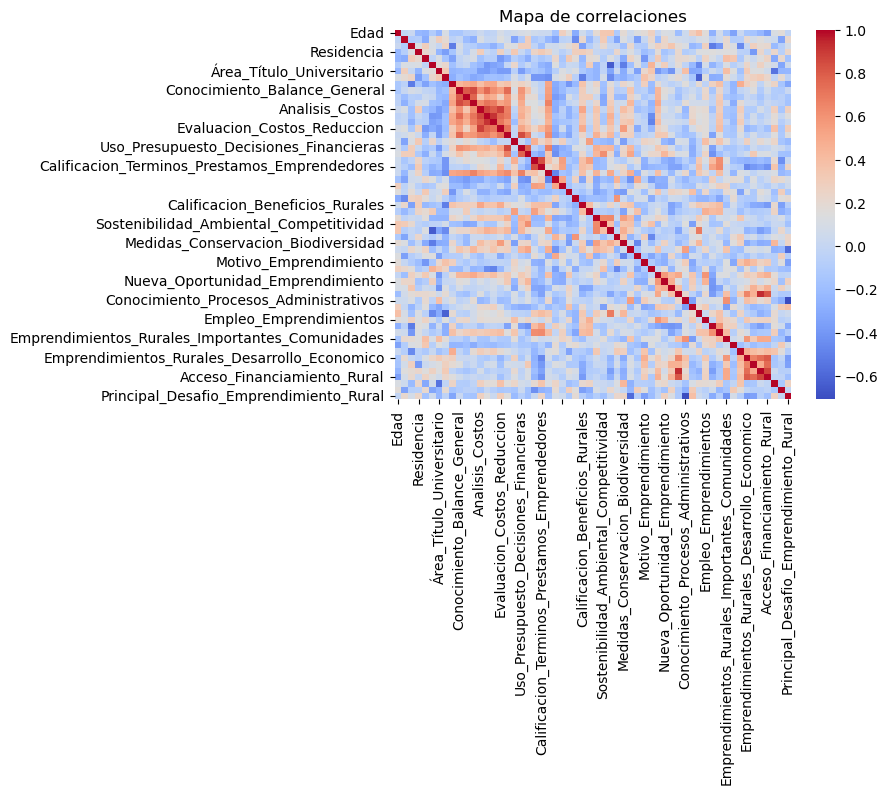

In [49]:
num_vars = preprocessd.select_dtypes(include=np.number)
sns.heatmap(num_vars.corr(), annot=False, cmap="coolwarm")
plt.title("Mapa de correlaciones")
plt.show()


In [60]:
preprocessd

,Edad,Género,Estado_Civil,Residencia,Tipo_Vivienda,Ingresos_Mensuales,Área_Título_Universitario,Sector_Emprendimiento,Conocimiento_Estado_Resultados,Conocimiento_Balance_General,...,Leyes_Claras_Emprendimiento,Factor_Mas_Importante_Emprendimiento,Practicas_Contabilidad_Ambiental_Competitividad,Emprendimientos_Rurales_Desarrollo_Economico,Emprendimientos_Rurales_Reducir_Pobreza,Acceso_Educacion_Rural,Acceso_Financiamiento_Rural,Problema_Causado_Emprendimiento_Medio_Ambiente,Beneficios_Emprendimientos_Rurales,Principal_Desafio_Emprendimiento_Rural
0,3,1,1,1,3,1,2,1,4,4,...,4,5,4,4,4,4,4,2,3,3
1,3,1,1,1,1,3,1,3,5,5,...,1,4,5,5,5,5,5,5,4,6
2,4,1,1,1,2,2,1,3,4,4,...,3,4,5,5,5,5,5,6,4,1
3,2,1,1,2,2,2,1,1,5,5,...,4,4,5,5,5,5,5,6,3,1
4,2,1,1,1,3,2,3,3,4,5,...,3,3,4,5,5,5,5,1,2,1
5,2,1,3,2,3,3,1,3,3,5,...,2,4,4,4,5,5,5,6,2,6
6,2,1,1,2,3,3,1,1,5,5,...,4,4,5,5,4,5,5,6,2,6
7,3,1,1,1,1,2,1,1,4,4,...,1,3,4,3,4,4,4,6,1,6
8,5,2,1,1,1,3,1,2,5,5,...,5,1,5,5,5,5,5,6,1,3
9,4,1,1,1,2,2,1,3,5,5,...,4,4,4,4,4,4,4,6,3,1


In [61]:
nuevo = preprocessd

### Correlaciones
Se evalúan **relaciones entre variables numéricas** (Pearson/Spearman) y se visualizan en **mapas de calor** u otras gráficas.

In [62]:
# Correlación de Spearman
corr_spearman = nuevo.corr(method='spearman')

In [64]:
corr_spearman

,Edad,Género,Estado_Civil,Residencia,Tipo_Vivienda,Ingresos_Mensuales,Área_Título_Universitario,Sector_Emprendimiento,Conocimiento_Estado_Resultados,Conocimiento_Balance_General,...,Leyes_Claras_Emprendimiento,Factor_Mas_Importante_Emprendimiento,Practicas_Contabilidad_Ambiental_Competitividad,Emprendimientos_Rurales_Desarrollo_Economico,Emprendimientos_Rurales_Reducir_Pobreza,Acceso_Educacion_Rural,Acceso_Financiamiento_Rural,Problema_Causado_Emprendimiento_Medio_Ambiente,Beneficios_Emprendimientos_Rurales,Principal_Desafio_Emprendimiento_Rural
Edad,1.000000,0.120211,0.124772,-0.271155,-0.249687,-0.150094,-0.170727,0.128173,-0.171501,-0.186788,...,-0.061846,-0.012540,-0.025165,-0.202195,-0.138730,-0.312866,-0.430658,0.099949,0.216543,0.000000
Género,0.120211,1.000000,0.020121,-0.034229,-0.251200,0.221937,0.403188,0.094197,-0.013631,0.026239,...,0.015354,-0.135965,0.001421,0.196712,0.045357,0.158526,0.034229,-0.074292,-0.310492,0.138052
Estado_Civil,0.124772,0.020121,1.000000,0.068540,0.254019,-0.062632,0.065779,0.281672,-0.418517,0.071545,...,-0.388389,0.136128,-0.327061,0.031241,0.312087,0.199172,0.228466,-0.186351,-0.057026,0.122859
Residencia,-0.271155,-0.034229,0.068540,1.000000,0.206886,0.194541,-0.248160,-0.361522,-0.120727,0.074168,...,0.107560,0.156798,-0.075520,-0.102704,-0.332516,0.229416,0.010526,0.185721,-0.046140,0.247008
Tipo_Vivienda,-0.249687,-0.251200,0.254019,0.206886,1.000000,-0.093628,0.093796,-0.170511,-0.351100,-0.069563,...,-0.021053,0.336489,-0.093031,0.057934,-0.031137,0.147409,0.254629,-0.239837,0.212179,-0.163380
Ingresos_Mensuales,-0.150094,0.221937,-0.062632,0.194541,-0.093628,1.000000,0.178710,0.159327,-0.109081,-0.060921,...,-0.043780,-0.079852,0.101318,0.225185,0.121523,0.288315,0.132288,0.068103,-0.356254,0.127917
Área_Título_Universitario,-0.170727,0.403188,0.065779,-0.248160,0.093796,0.178710,1.000000,0.307397,-0.271257,-0.272997,...,-0.069743,0.070107,-0.151493,0.295069,0.176557,0.130551,0.051344,-0.468518,-0.231306,-0.195050
Sector_Emprendimiento,0.128173,0.094197,0.281672,-0.361522,-0.170511,0.159327,0.307397,1.000000,-0.307134,-0.168124,...,-0.370425,0.026849,-0.096678,0.087361,0.322831,0.262640,0.176126,-0.067498,0.240973,-0.031722
Conocimiento_Estado_Resultados,-0.171501,-0.013631,-0.418517,-0.120727,-0.351100,-0.109081,-0.271257,-0.307134,1.000000,0.601218,...,0.419769,-0.199814,0.463811,0.318275,0.144586,0.000000,0.160969,0.238080,-0.156795,-0.304934
Conocimiento_Balance_General,-0.186788,0.026239,0.071545,0.074168,-0.069563,-0.060921,-0.272997,-0.168124,0.601218,1.000000,...,0.260138,-0.304158,0.092516,0.082232,0.170615,-0.071842,0.107131,0.022502,-0.056190,-0.135969


**Variables categóricas ordinales**

In [75]:
df_ordinales = preprocessd.loc[:, var_categ_ordinal].copy()
df_ordinales

,Ingresos_Mensuales,Conocimiento_Estado_Resultados,Conocimiento_Balance_General,Conocimiento_Flujo_Efectivo,Conocimiento_Analisis_Financiero,Analisis_Costos,Uso_Contabilidad_Ingresos,Uso_Contabilidad_Gastos,Evaluacion_Costos_Reduccion,Manejo_Presupuesto,...,Colombia_Oportunidades_Emprendedores,Conocimiento_Ley_Fomento,Empleo_Emprendimientos,Marco_Legal_Suficiente_Emprendimiento,Leyes_Claras_Emprendimiento,Factor_Mas_Importante_Emprendimiento,Emprendimientos_Rurales_Desarrollo_Economico,Emprendimientos_Rurales_Reducir_Pobreza,Acceso_Educacion_Rural,Acceso_Financiamiento_Rural
0,1,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,5,4,4,4,4
1,3,5,5,5,4,5,5,4,4,5,...,5,1,5,1,1,4,5,5,5,5
2,2,4,4,4,4,4,4,4,4,4,...,4,3,5,3,3,4,5,5,5,5
3,2,5,5,5,5,5,5,5,5,5,...,3,5,5,4,4,4,5,5,5,5
4,2,4,5,5,5,4,5,5,3,3,...,3,1,4,3,3,3,5,5,5,5
5,3,3,5,3,4,5,5,4,5,5,...,2,1,5,2,2,4,4,5,5,5
6,3,5,5,5,5,5,5,5,4,5,...,4,5,4,3,4,4,5,4,5,5
7,2,4,4,4,4,4,4,4,4,4,...,4,4,2,2,1,3,3,4,4,4
8,3,5,5,5,5,5,5,5,5,5,...,3,5,5,2,5,1,5,5,5,5
9,2,5,5,5,5,4,5,5,4,4,...,5,3,5,4,4,4,4,4,4,4


### Asociación categórica (Chi-cuadrado)
Se analizan **dependencias entre variables categóricas** mediante tablas de contingencia y prueba Chi-cuadrado.

In [82]:
# 2. Calcula el chi-cuadrado
results = []
for var1, var2 in combinations(df_ordinales.columns, 2):
    table = pd.crosstab(df_ordinales[var1].dropna(), df_ordinales[var2].dropna())
    chi2, p, dof, _ = chi2_contingency(table, correction=False)
    results.append({
        'Variable 1': var1,
        'Variable 2': var2,
        'Chi2': round(chi2, 3),
        'p-value': round(p, 4),
        'dof': dof,
        'Rechaza H0 (p<0.05)': p < 0.05
    })
chi2_df = pd.DataFrame(results)

# 3. Filtra significativos
sig_df = chi2_df[chi2_df['Rechaza H0 (p<0.05)']]

# 4. Muestra en pantalla
print("=== Todos los pares ===")
display(chi2_df)        # en Jupyter
print("\n=== Sólo pares significativos ===")
display(sig_df)

# 5. (Opcional) Exporta a Excel o CSV
chi2_df.to_excel("chi2_independencia_resumen.xlsx", index=False)
sig_df.to_excel("chi2_independencia_significativos.xlsx", index=False)
# ó bien:
# chi2_df.to_csv("chi2_resumen.csv", index=False)

=== Todos los pares ===


,Variable 1,Variable 2,Chi2,p-value,dof,Rechaza H0 (p<0.05)
0,Ingresos_Mensuales,Conocimiento_Estado_Resultados,11.017,0.2007,8,False
1,Ingresos_Mensuales,Conocimiento_Balance_General,33.382,0.0008,12,True
2,Ingresos_Mensuales,Conocimiento_Flujo_Efectivo,10.986,0.5301,12,False
3,Ingresos_Mensuales,Conocimiento_Analisis_Financiero,21.950,0.1448,16,False
4,Ingresos_Mensuales,Analisis_Costos,13.035,0.3665,12,False
...,...,...,...,...,...,...
661,Emprendimientos_Rurales_Desarrollo_Economico,Acceso_Educacion_Rural,13.200,0.0014,2,True
662,Emprendimientos_Rurales_Desarrollo_Economico,Acceso_Financiamiento_Rural,15.916,0.0003,2,True
663,Emprendimientos_Rurales_Reducir_Pobreza,Acceso_Educacion_Rural,11.657,0.0029,2,True
664,Emprendimientos_Rurales_Reducir_Pobreza,Acceso_Financiamiento_Rural,13.606,0.0011,2,True



=== Sólo pares significativos ===


,Variable 1,Variable 2,Chi2,p-value,dof,Rechaza H0 (p<0.05)
1,Ingresos_Mensuales,Conocimiento_Balance_General,33.382,0.0008,12,True
33,Ingresos_Mensuales,Emprendimientos_Rurales_Reducir_Pobreza,26.150,0.0010,8,True
36,Conocimiento_Estado_Resultados,Conocimiento_Balance_General,16.154,0.0129,6,True
37,Conocimiento_Estado_Resultados,Conocimiento_Flujo_Efectivo,17.588,0.0073,6,True
38,Conocimiento_Estado_Resultados,Conocimiento_Analisis_Financiero,23.495,0.0028,8,True
...,...,...,...,...,...,...
661,Emprendimientos_Rurales_Desarrollo_Economico,Acceso_Educacion_Rural,13.200,0.0014,2,True
662,Emprendimientos_Rurales_Desarrollo_Economico,Acceso_Financiamiento_Rural,15.916,0.0003,2,True
663,Emprendimientos_Rurales_Reducir_Pobreza,Acceso_Educacion_Rural,11.657,0.0029,2,True
664,Emprendimientos_Rurales_Reducir_Pobreza,Acceso_Financiamiento_Rural,13.606,0.0011,2,True


### ACM — Correspondencias múltiples
Se aplica **ACM** para variables categóricas, identificando ejes latentes de asociación.

### Visualización
Se generan **gráficos** para explorar y comunicar patrones en los datos.

In [93]:
df_nominales = preprocessd.loc[:, var_categ_nominal].copy()

In [98]:
vars_all = []
for lst in (var_categ_ordinal, var_categ_nominal):
    for col in lst:
        if col not in vars_all:
            vars_all.append(col)

# 3. Crea el nuevo DataFrame a partir de preprocessd
df_categ = preprocessd.loc[:, vars_all].copy()

### ACM — Correspondencias múltiples
Se aplica **ACM** para variables categóricas, identificando ejes latentes de asociación.

### Visualización
Se generan **gráficos** para explorar y comunicar patrones en los datos.

Inercia acumulada Dim1+Dim2: 2195.04%


,Dim1,Dim2
0,-0.082264,1.183857
1,-0.181626,-0.569058
2,-0.144694,0.204031
3,-0.422864,-0.596494
4,-0.109729,-0.183866


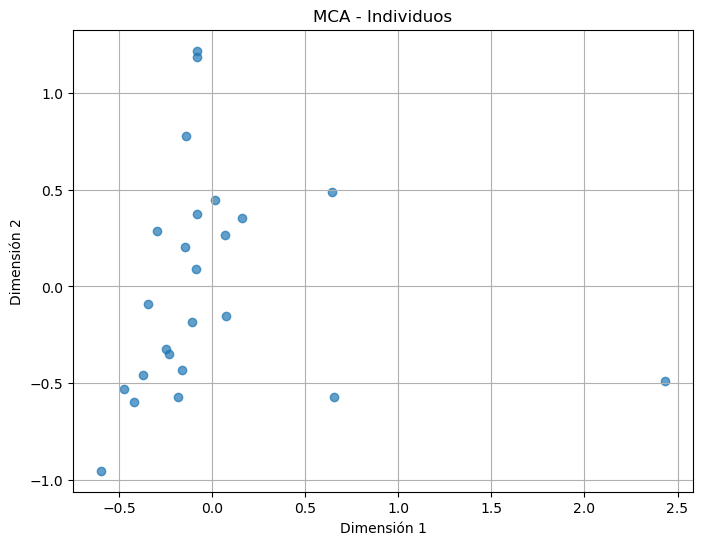

In [99]:
df_cat1 = df_categ.astype(str)

# 2. Ajustar ACM
mca = prince.MCA(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    random_state=42
).fit(df_cat)

# 3. Coordenadas de las filas (individuos)
coords = mca.row_coordinates(df_cat1)
coords.columns = ["Dim1", "Dim2"]

# 4. Inercia (varianza explicada)
inercia = mca.percentage_of_variance_

print(f"Inercia acumulada Dim1+Dim2: {sum(inercia[:2]):.2%}")
display(coords.head())

# 5. Gráfico
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(coords["Dim1"], coords["Dim2"], alpha=0.7)
plt.xlabel("Dimensión 1")
plt.ylabel("Dimensión 2")
plt.title("MCA - Individuos")
plt.grid(True)
plt.show()

# Segmentación: Clustering (K-Means)

En esta sección se realiza la **segmentación** de los registros en grupos homogéneos. El flujo es:

1. **Selección de variables numéricas** relevantes para segmentar.
2. **Estandarización** con `StandardScaler`.
3. **Selección de *k*** usando métodos de **Codo (Elbow)** y **Silueta**.
4. **Entrenamiento de K-Means** y **asignación de clúster**.
5. **Proyección PCA (2D)** para visualización.
6. **Resumen por clúster** para perfilamiento posterior.


In [ ]:
# --- Clustering K-Means ---
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selección de variables numéricas
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
X = df[num_cols].dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Método del codo y silueta
inertias = []
sil_scores = []
K = range(2, 9)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

best_k = K[np.argmax(sil_scores)]
print("Sugerencia de k por Silhouette:", best_k)

# Entrenar modelo final
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
labels = kmeans.fit_predict(X_scaled)
df["cluster"] = labels

# Visualización PCA
pca = PCA(n_components=2, random_state=42)
proj = pca.fit_transform(X_scaled)
plt.figure(figsize=(7,5))
for k in sorted(set(labels)):
    plt.scatter(proj[labels==k,0], proj[labels==k,1], label=f"Cluster {k}", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering (PCA 2D)")
plt.legend()
plt.show()

# Resumen por clúster
summary = df.groupby("cluster")[num_cols].mean().round(2)
summary

# 📌 Conclusiones y Recomendaciones

## 1) Principales hallazgos
- Se identificaron **grupos diferenciados** de emprendedores según variables como edad, ingresos, adopción tecnológica y nivel educativo.
- El uso de software contable muestra relación con mayor organización financiera y posiblemente con mayores ingresos.
- PCA/ACM permitió visualizar patrones y proximidad entre perfiles.

## 2) Implicaciones
- **Política pública:** Programas focalizados según clúster (formación financiera, digitalización).
- **Intervención institucional/empresarial:** Capacitación en software contable, acceso a crédito y mentorías según madurez del emprendimiento.
- **Investigación:** Profundizar en causalidad e impacto longitudinal de la formación y digitalización.

## 3) Líneas de acción
- **Cluster A:** Alfabetización financiera y kits digitales.
- **Cluster B:** Formalización y vinculación a mercados.
- **Cluster C:** Escalamiento, acceso a capital e internacionalización.
